### **1. Introduction** ###

**Problem**: Risk prediction of impact of different factors to traffic accident  
**Audience**: Fleet Services   
**Solution Provider**: Navigation System Software Provider  

Traffic accidents has been one of the major threats to fleet services, as fleet vehicles are facing more risks in long-distance commute, and higher pressure to meet the delivery deadlines. Hereby, when experiencing severe weather and traffic accidents, fleet services are under high risks or may even cause accidents if not well operated. 

To help fleet companies and their drivers without compromising the high-efficiency that they are trying hard to meet, a navigation company is working on creating a prediction model of how likely different factors including weather, location, driver situation, vehicle types and more.    

### **2. About Data** ###

#### **2.1 Data Source and Overview** ####

The data is provided by **Seattle Police Station** which shows traffic collisions from **2004 to present on a weekly basis**. 

The data contains **37 independent variables and 194,673 entries**, and records the situation of the collisions including **weather condition, location, type of collision, vehicles involved, road and light conditions and more**.  
We will be choosing the impact factors regarding collision situations that will be most applicable for fleet services.


#### **2.2 Selected Variables** ####

By looking at the data, we found that there are multiple parameters recorded for a single accident, including **collision ids and keys, collision data, severity code defined by SPD, collision status and type, location, pedestrian and vehicles involved, weather, road and light condition, speed, and more**. An brief overview is provided below:

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('Data-Collisions.csv')
df = pd.DataFrame(data)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In this case, the **severity code('SEVERITYCODE')** is the target value we want to predict, which means the level of severity - the more severe it is, more likely the fleet company should adjust the delivery time window and notify the driver in advance. 

In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Then we will choose the independent variables that are critical to predict the collistion severity. Among all the factors, we have to pick the ones that **cause the collision** but **not the result of collision**. For example, collision IDs and keys which are for the Police's purpose to keep record should be removed, as well as how many pedestrian and vehicles involved - such details reflecting severity are already part of the target value we want to predict.  
  
Hereby, we picked the following parameters shown below:

In [5]:
df2 = df[['SEVERITYCODE', 'X', 'Y', 'INATTENTIONIND', 
          'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING']]
df2.head()

,SEVERITYCODE,X,Y,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,NaN,0,Raining,Wet,Daylight,NaN


### **03 Methodolody** ###

Based on the current given variables, we will further explore the entries to clean up missing variables and check if there're enough valid entries

In [6]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from sklearn import preprocessing

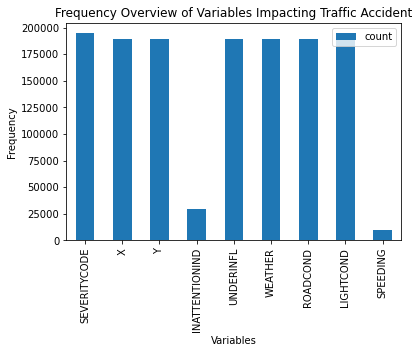

In [7]:
variables = df2.describe(include="all")
variables_freq=variables[['SEVERITYCODE', 'X', 'Y', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING']]
variables_freq.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
variables_freq = variables_freq.transpose()
variables_freq.plot(kind = 'bar')
plt.title("Frequency Overview of Variables Impacting Traffic Accident")
plt.xlabel("Variables")
plt.ylabel("Frequency")
x_ticks = pd.DataFrame(variables_freq.columns)
plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Severity Code')

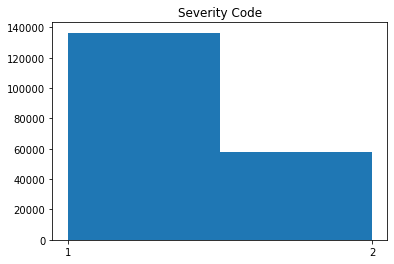

In [8]:
plt.hist(df2['SEVERITYCODE'], bins=2)
plt.xticks([1,2])
plt.title('Severity Code')

Because severity code is the value we want to predict, we will need to convert the variable to labels and will have to set other independent variables as vectors variable to indicate situation levels (except location input which are X and Y).

In [9]:
severitycode = df2['SEVERITYCODE'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severitycode = labels.transform (severitycode)

In [10]:
variables_ind = df2[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING']]
#check Inattention situation
atten_levels = variables_ind['INATTENTIONIND'].unique()
#set numeric values for attention level
variables_ind["INATTENTIONIND"].replace("Y", 1, inplace=True)
variables_ind["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#check drug influence situation
variables_ind['UNDERINFL'].replace('Y', 1, inplace=True)
variables_ind['UNDERINFL'].replace(np.nan, 0, inplace=True)
variables_ind['UNDERINFL'].replace('N', 0, inplace=True)
variables_ind['UNDERINFL'].replace('1', 1, inplace=True)
variables_ind['UNDERINFL'].replace('0', 0, inplace=True)
drug_levels = variables_ind['UNDERINFL'].unique()

#check weather influence situation and pick severe levels
variables_ind['WEATHER'].replace(np.nan, 0, inplace=True)
variables_ind['WEATHER'].replace('Clear', 0, inplace=True)
variables_ind['WEATHER'].replace('Unknown', 0, inplace=True)
variables_ind['WEATHER'].replace('Other', 1, inplace=True)
variables_ind['WEATHER'].replace('Overcast', 1, inplace=True)
variables_ind['WEATHER'].replace('Partly Cloudy', 1, inplace=True)
variables_ind['WEATHER'].replace('Fog/Smog/Smoke', 2, inplace=True)
variables_ind['WEATHER'].replace('Raining', 2, inplace=True)
variables_ind['WEATHER'].replace('Snowing', 3, inplace=True)
variables_ind['WEATHER'].replace('Sleet/Hail/Freezing Rain', 3, inplace=True)
variables_ind['WEATHER'].replace('Blowing Sand/Dirt', 4, inplace=True)
variables_ind['WEATHER'].replace('Severe Crosswind', 4, inplace=True)


#check road condition and pick severe levels
road_levels = variables_ind['ROADCOND'].unique()
variables_ind['ROADCOND'].replace(np.nan, 0, inplace=True)
variables_ind['ROADCOND'].replace('Other', 1, inplace=True)
variables_ind['ROADCOND'].replace('Unknown',0, inplace=True)
variables_ind['ROADCOND'].replace('Dry', 0, inplace=True)
variables_ind['ROADCOND'].replace('Sand/Mud/Dirt', 1, inplace=True)
variables_ind['ROADCOND'].replace('Wet', 1, inplace=True)
variables_ind['ROADCOND'].replace('Standing Water', 2, inplace=True)
variables_ind['ROADCOND'].replace('Snow/Slush', 2, inplace=True)
variables_ind['ROADCOND'].replace('Ice', 3, inplace=True)
variables_ind['ROADCOND'].replace('Oil', 3, inplace=True)

#check light condition and pick severe levels
road_levels = variables_ind['LIGHTCOND'].unique()
variables_ind['LIGHTCOND'].replace(np.nan, 0, inplace=True)
variables_ind['LIGHTCOND'].replace('Daylight', 0, inplace=True)
variables_ind['LIGHTCOND'].replace('Unknown', 0, inplace=True)
variables_ind['LIGHTCOND'].replace('Other', 0, inplace=True)
variables_ind['LIGHTCOND'].replace('Dusk', 1, inplace=True)
variables_ind['LIGHTCOND'].replace('Dawn', 1, inplace=True)
variables_ind['LIGHTCOND'].replace('Dark - Street Lights On', 2, inplace=True)
variables_ind['LIGHTCOND'].replace('Dark - Unknown Lighting', 2, inplace=True)
variables_ind['LIGHTCOND'].replace('Dark - Street Lights Off', 3, inplace=True)
variables_ind['LIGHTCOND'].replace('Dark - No Street Lights', 3, inplace=True)

#check speeding condition and pick severe levels
road_levels = variables_ind['SPEEDING'].unique()
variables_ind['SPEEDING'].replace('0', 0, inplace=True)
variables_ind['SPEEDING'].replace(np.nan, 0, inplace=True)
variables_ind['SPEEDING'].replace('Y', 1, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,SEVERITYCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
SEVERITYCODE,1.000000,0.046378,0.044377,0.036330,0.023395,-0.003625,0.038938
INATTENTIONIND,0.046378,1.000000,-0.025953,-0.007797,-0.020218,-0.038663,-0.048805
UNDERINFL,0.044377,-0.025953,1.000000,0.017130,0.016764,0.238641,0.092356
WEATHER,0.036330,-0.007797,0.017130,1.000000,0.729870,0.185692,0.124187
ROADCOND,0.023395,-0.020218,0.016764,0.729870,1.000000,0.186130,0.163104
LIGHTCOND,-0.003625,-0.038663,0.238641,0.185692,0.186130,1.000000,0.098468
SPEEDING,0.038938,-0.048805,0.092356,0.124187,0.163104,0.098468,1.000000


No handles with labels found to put in legend.


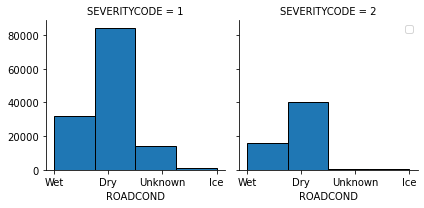

In [11]:
import seaborn as sns

bins = np.linspace(variables_ind.ROADCOND.min(), variables_ind.ROADCOND.max(),5)
g = sns.FacetGrid(df, col="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ROADCOND',bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

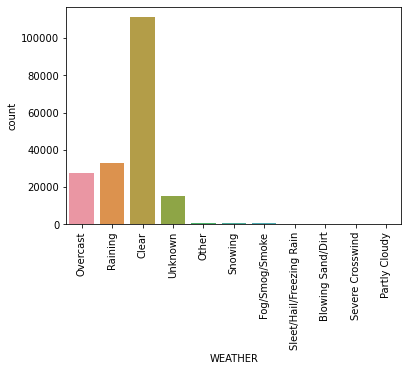

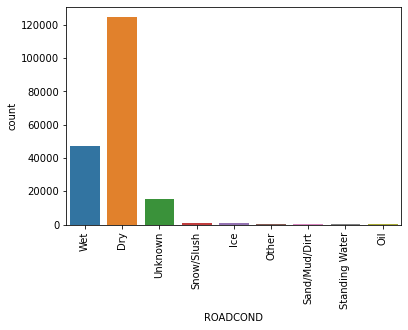

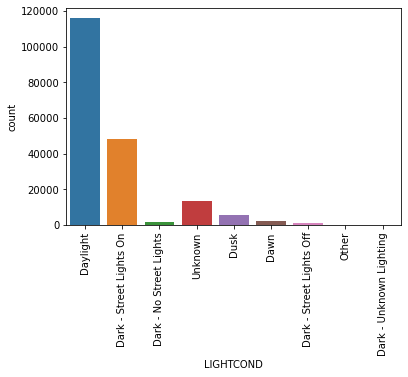

In [12]:
import seaborn as sns
ax1= sns.countplot(x="WEATHER",data=df2)
plt.xticks(rotation = 90)
plt.show()

ax2 = sns.countplot(x="ROADCOND",data=df2)
plt.xticks(rotation = 90)
plt.show()

ax3 = sns.countplot(x="LIGHTCOND",data=df2)
plt.xticks(rotation = 90)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
import folium
import webbrowser
from folium import plugins
import pandas as pd
from sklearn import preprocessing

In [13]:
x = variables_ind.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
variables_norm = pd.DataFrame(x_scaled, columns = variables_ind.columns)

In [14]:
!pip install -U scikit-learn
from scipy import stats
import scipy as sp
import random

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.23.2)


In [15]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [16]:
 !pip install six

In [17]:
!pip install -U imbalanced-learn
!conda install -c conda-forge imbalanced-learn -y

Requirement already up-to-date: imbalanced-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.7.0)
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [18]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [19]:
!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

  Cloning https://github.com/scikit-learn-contrib/imbalanced-learn.git to /tmp/pip-req-build-gyye9bj2
  Running command git clone -q https://github.com/scikit-learn-contrib/imbalanced-learn.git /tmp/pip-req-build-gyye9bj2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ry3rbxdc/wheels/6c/07/cf/38cb9b7cc9e6a0ac7648a80ec192b6f2d863405fb0049ac0ff
Successfully built imbalanced-learn
  Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0


In [21]:
from imblearn.over_sampling import SMOTE

In [36]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score

In [90]:
X=variables_ind[["SPEEDING", "INATTENTIONIND", "UNDERINFL","WEATHER","LIGHTCOND"]].values
y=variables_ind[["SEVERITYCODE"]].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (155738, 5) (155738, 1)
Test set: (38935, 5) (38935, 1)


In [91]:
balanced = SMOTE (random_state=8)
x_balance, y_balance= balanced.fit_sample(x_train, y_train)

In [98]:
Deci_Tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
Deci_Tree.fit(x_balance, y_balance)
yhat_tree = Deci_Tree.predict(x_test)
print('Accuracy score for Decision Tree = ', accuracy_score(yhat_tree, y_test))
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhat_tree.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))
print(classification_report(yhat_tree,y_test))

Accuracy score for Decision Tree =  0.5966097341723385
Confusion Matrix - Decision Tree
Predicted      1      2    All
True                          
1          18370   8870  27240
2           6836   4859  11695
All        25206  13729  38935
              precision    recall  f1-score   support

           1       0.67      0.73      0.70     25206
           2       0.42      0.35      0.38     13729

    accuracy                           0.60     38935
   macro avg       0.54      0.54      0.54     38935
weighted avg       0.58      0.60      0.59     38935



In [101]:
#testing conditions
x_test_test = np.array([[0,0,3,1,0]])
y_hat_result = Deci_Tree.predict(x_test_test)
print("the severity level is", y_hat_result)

the severity level is [2]


In [49]:
x_test

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 2.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 0.]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [102]:
#Logistic Regression
Logi = LogisticRegression(solver='sag').fit(x_balance, y_balance)
yhat_log = Logi.predict(x_test)
yhat_prob = Logi.predict_proba(x_test)
print(log_loss(y_test, yhat_prob))
print ("Accuracy", accuracy_score(yhat_log,y_test))
print (classification_report(y_test, yhat_log))
cnf_matrix = confusion_matrix(y_test, yhat_log, labels=[1,2])
np.set_printoptions(precision=8)

0.6891217461804294
Accuracy 0.6086811352253756
              precision    recall  f1-score   support

           1       0.73      0.71      0.72     27240
           2       0.36      0.38      0.37     11695

    accuracy                           0.61     38935
   macro avg       0.54      0.54      0.54     38935
weighted avg       0.61      0.61      0.61     38935



In [29]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18370  8870]
 [ 6836  4859]]
Avg F1-score: 0.6049
Jaccard score: 0.5391


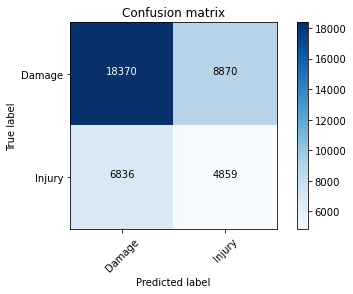

In [103]:
#Decision Tree
matrix1 = confusion_matrix(y_test, yhat_tree)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix1, classes=['Damage','Injury'],normalize= False,  title='Confusion matrix')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_tree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_tree))

In [ ]:
y_hat_p = lm.predict(x)

Confusion matrix, without normalization
[[19306  7934]
 [ 7302  4393]]
Avg F1-score: 0.6115
Jaccard score: 0.5589


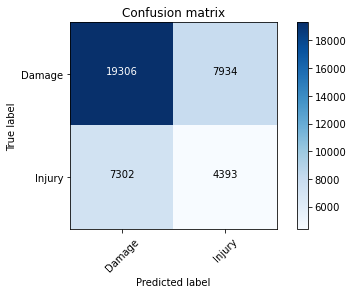

In [105]:
#Logi
matrix2 = confusion_matrix(y_test, yhat_log)
plot_confusion_matrix(matrix2, classes=['Damage','Injury'],normalize= False,  title='Confusion matrix')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat_log, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat_log))

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_balance,y_balance)
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=1)
knn_clf.fit(x_balance,y_balance)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_balance, neigh.predict(x_balance)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.plot(range(1,kmean),mean,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,kmean),mean-1*std_acc,mean+1*std, alpha=0.1)

In [ ]:
# define the world map centered around Seattle with a low zoom level
seattle_map = folium.Map(location=[47.608013, -122.335167], zoom_start=10, tiles='Stamen Terrain')

# display seattle map
seattle_map

In [25]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_balance, y_balance) 

In [ ]:
yhat1 = clf.predict(x_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat1))

In [ ]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(x_balance, y_balance) 
yhat1 = clf1.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat1))